In [5]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

np.random.seed(20160614)
tf.random.set_seed(20190825)

In [7]:
# データ作成
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1', 'x2'])
    df['t'] = t
    return df

df0 = generate_datablock(15, [-8, -8], 22, 0)
df1 = generate_datablock(15, [ 7, -8], 22, 0)
df2 = generate_datablock(10, [-8,  7], 22, 0)
df3 = generate_datablock(25, [ 5,  5], 22, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [8]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set["t"].values

In [11]:
model = models.Sequential()
# 活性化関数：ハイパボリックタンジェント、layers.Dense：一次関数＋活性化関数
model.add(layers.Dense(2, activation="tanh", input_shape=(2,), name="hidden"))
# 活性化関数：シグモイド関数
model.add(layers.Dense(1, activation="sigmoid", name="output"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2)                 6         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 最適化関数：Adam、誤差関数：クロスエントロピー
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["acc"])

In [13]:
history = model.fit(train_x, train_t,
                   batch_size=len(train_set), epochs=5000, verbose=0)

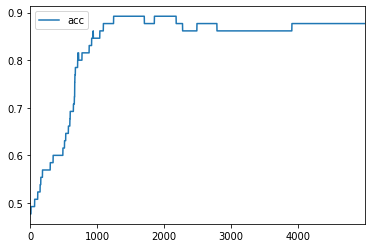

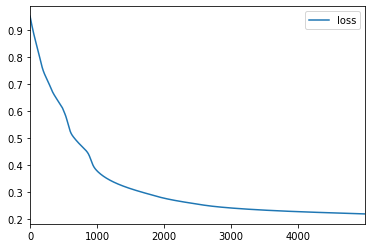

In [16]:
DataFrame({"acc":history.history["acc"]}).plot()
DataFrame({"loss":history.history["loss"]}).plot()

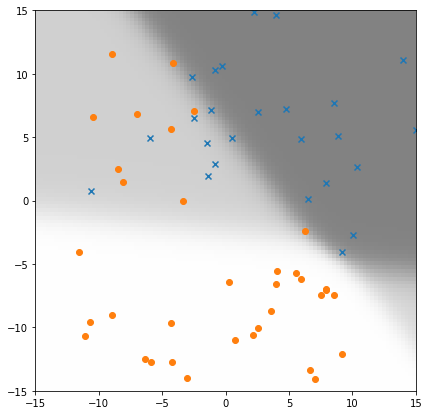

In [17]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([-15, 15])
subplot.set_xlim([-15, 15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = [[x1, x2] for x2 in np.linspace(-15, 15, 100) 
                      for x1 in np.linspace(-15, 15, 100)]
p_vals = model.predict(np.array(locations)).reshape((100, 100))
subplot.imshow(p_vals, origin='lower', extent=(-15, 15, -15, 15),
               vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.5)

#### 隠れ層のノードを変更

In [20]:
model = models.Sequential()
model.add(layers.Dense(4, activation='tanh', input_shape=(2,),
                      name="hidden"))
model.add(layers.Dense(1, activation="sigmoid", name="output"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 4)                 12        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


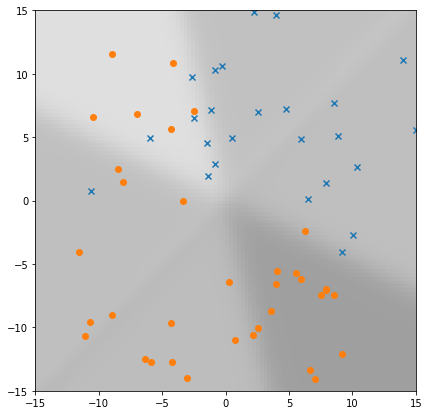

In [21]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([-15, 15])
subplot.set_xlim([-15, 15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = [[x1, x2] for x2 in np.linspace(-15, 15, 100) 
                      for x1 in np.linspace(-15, 15, 100)]
p_vals = model.predict(np.array(locations)).reshape((100, 100))
subplot.imshow(p_vals, origin='lower', extent=(-15, 15, -15, 15),
               vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.5)